## CO2 Emissions and Temperature Forecasting Model: What is 2030 going to be like?

Its high time for us to  work on the warnings by COP26. But are we really bothered?

As per the last UN climate Summit the countries agreed to follow the Glass Glow Climate Act , which stated to reduce the carbon use by 45% by 2030.

Notable provisions in the Glasgow Climate Pact include:


#### Agreements:

- The United States and China, the two largest emitters, agreed to work together on climate despite recent rifts in diplomatic relations.

- Over one hundred nations pledged to cut 30 percent of their emissions of methane—a greenhouse gas that dissipates more quickly than carbon but fuels up to eighty times more heating over a twenty-year period—by 2030.

- More than 130 nations, together possessing 90 percent of the world’s forests, agreed to halt and then reverse deforestation by 2030.

- Over 450 financial institutions overseeing $130 trillion in assets promised to align their portfolios with the goal of achieving net-zero emissions by 2050.

#### Limitations:
- The ideology of the nations on how and when they will work to limit the carbon is not defined.

- Coal-reliant countries have indicated that they will not completely stop using coal until the 2040s or later.




### Since the countries have not completely agreed upon giving up fossil fuel as their main energy resource, we decided to look at it effect in our project.

###### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pmdarima as pm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16
import statsmodels.api as sm
import plotly.express as px 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
import statsmodels
import warnings
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

# Looking at the _WWW_ - What, When, Who

Before we jump into the Data Science-y stuff, we want to look at what is the actual problem we are facing.

In this section, we will look at how countries have been contributing to the global problem of climate change. To assess this, we have used the dataset for annual country emissions(in billion tonnes) and the share of each country in global emissions. These datasets were obtained from [Our World in Data](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions).

So, importing the data and cleaning the empty values.

In [2]:
annual_country_emissions = pd.read_csv('/Users/anushadas/Downloads/annual-co2-emissions-per-country.csv')
country_share_emissions = pd.read_csv('/Users/anushadas/Downloads/annual-share-of-co2-emissions.csv')

In [3]:
annual_country_emissions.shape

(23949, 4)

In [4]:
country_share_emissions.shape

(23949, 4)

In [5]:
annual_country_emissions

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256
...,...,...,...,...
23944,Zimbabwe,ZWE,2016,10737567
23945,Zimbabwe,ZWE,2017,9581633
23946,Zimbabwe,ZWE,2018,11854367
23947,Zimbabwe,ZWE,2019,10949084


In [6]:
country_share_emissions

,Entity,Code,Year,Share of global annual CO2 emissions
0,Afghanistan,AFG,1949,0.00
1,Afghanistan,AFG,1950,0.00
2,Afghanistan,AFG,1951,0.00
3,Afghanistan,AFG,1952,0.00
4,Afghanistan,AFG,1953,0.00
...,...,...,...,...
23944,Zimbabwe,ZWE,2016,0.03
23945,Zimbabwe,ZWE,2017,0.03
23946,Zimbabwe,ZWE,2018,0.03
23947,Zimbabwe,ZWE,2019,0.03


In [7]:
country_share_emissions.isnull().sum()

Entity                                     0
Code                                    2650
Year                                       0
Share of global annual CO2 emissions       0
dtype: int64

In [8]:
annual_country_emissions.isnull().sum()

Entity                     0
Code                    2650
Year                       0
Annual CO2 emissions       0
dtype: int64

In [9]:
country_share_emissions = country_share_emissions.drop(columns='Code')
annual_country_emissions = annual_country_emissions.drop(columns='Code')

In [10]:
country_share_emissions.drop(country_share_emissions[country_share_emissions['Entity'].isin(['World','Europe (excl. EU-27)', 'Europe','EU-28', 'North America', 'Asia','EU-27','Asia (excl. China & India)','Reunion','Europe (excl. EU-28)','North America (excl. USA)','South America'])].index,inplace = True)

## What is happening? When did it start?

According to [NOAA](https://www.noaa.gov/stories/carbon-dioxide-levels-race-past-troubling-milestone), the world saw a sharp increase in burning of fossil fuels from 1950s. Burning of fossil fuels has been the greatest source of carbon emissions and this is evident from our graph below.

In [11]:
world=annual_country_emissions[annual_country_emissions['Entity']=='World']

Text(0, 0.5, 'Emission Volume')

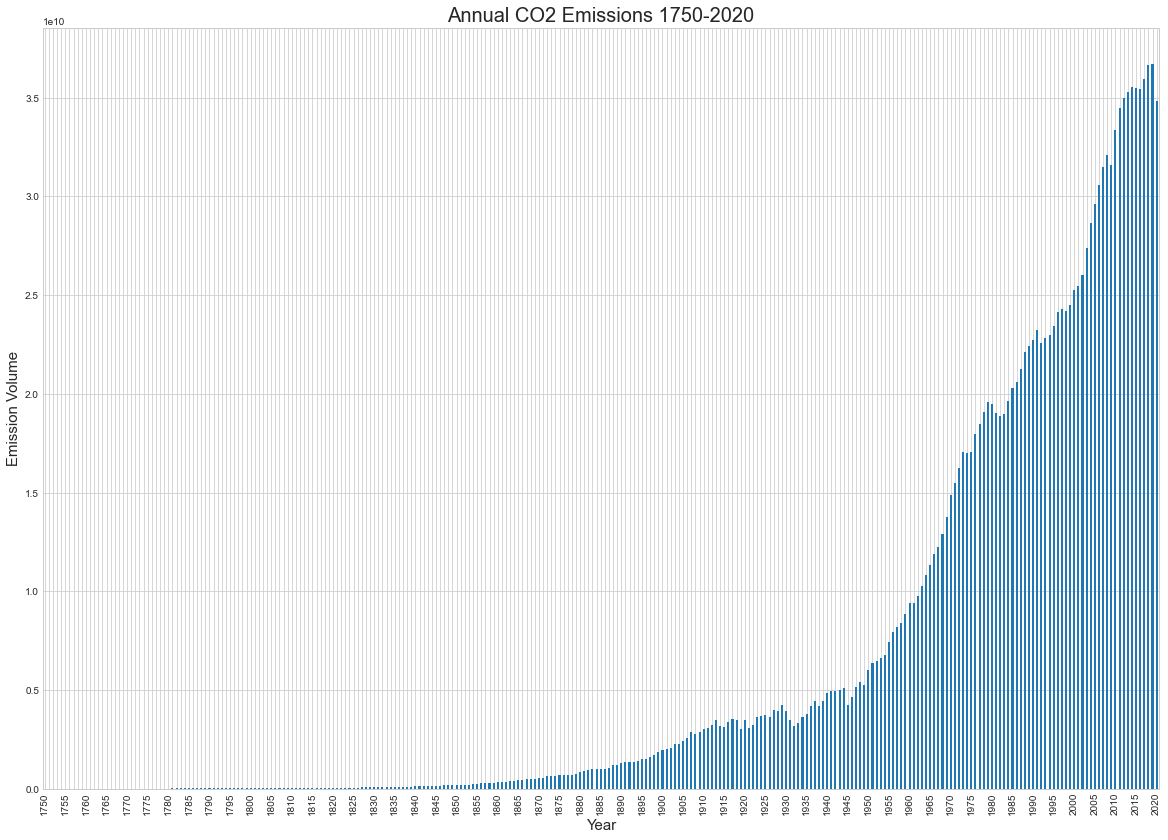

In [12]:
avg = world.groupby(world['Year']).mean()
fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
avg["Annual CO2 emissions"].plot.bar(linewidth=1)
plt.title('Annual CO2 Emissions 1750-2020', fontsize=20)
# Show only some xticks
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Emission Volume', fontsize=15)

# Who is causing the most damage?



Now that we know what is happening, we want to know who is doing it. Some countries have been more responsible for the damage than others. We decided to look at some recent data(2015-2020) and calculate the average share of carbon emissions for each country

In [13]:
country_share_emissions = country_share_emissions[country_share_emissions['Year']>2015]

In [14]:
avg_emissions = country_share_emissions.groupby('Entity')['Share of global annual CO2 emissions'].mean().to_dict()
country_avg_emissions = pd.DataFrame(list(avg_emissions.items()), columns=['Entity', 'Average Emissions 2015-2020'])

In [15]:
countries = np.unique(country_avg_emissions['Entity'])
# Creating figure using 'plotly' library
data = [ dict(type = 'choropleth',locations = countries,z = list(country_avg_emissions['Average Emissions 2015-2020']),locationmode = 'country names',text = countries,marker = dict(line = dict(color = 'rgb(0,0,0)', width = 1)),colorbar = dict(autotick = True, tickprefix = '', title = '# Emission\nShare\n'))]
layout = dict(title = 'Emissions shares by countries',geo = dict(showframe = False,showocean = True,oceancolor = 'rgb(136, 235, 252)',projection = dict(type = 'orthographic',rotation = dict(lon = 60,lat = 10),),lonaxis =  dict(showgrid = False,gridcolor = 'rgb(102, 102, 102)'),lataxis = dict(showgrid = False,gridcolor = 'rgb(102, 102, 102)')),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

The plot indicates contribution of all countries. Since some of the countries show a higher share of emissions, we filtered the data further to look at the top 10 emitters that influence climate change the most.

In [16]:
country_avg_emissions.sort_values(by=['Average Emissions 2015-2020'], ascending=False, inplace=True)
country_avg_emissions.head(10)

,Entity,Average Emissions 2015-2020
41,China,28.468
211,United States,14.366
90,India,6.950
164,Russia,4.576
1,Africa,3.822
92,International transport,3.308
99,Japan,3.160
75,Germany,2.060
93,Iran,1.970
185,South Korea,1.790


As we can see, China and United States are the largest contributors of carbon emissions. It is also interesting to see that international transport is also a significasnt contributor as well!

In [17]:
df = annual_country_emissions[annual_country_emissions['Entity'].isin(['China','United States','India','Russia','Africa','International transport','Japan','Germany','Iran','South Korea'])]

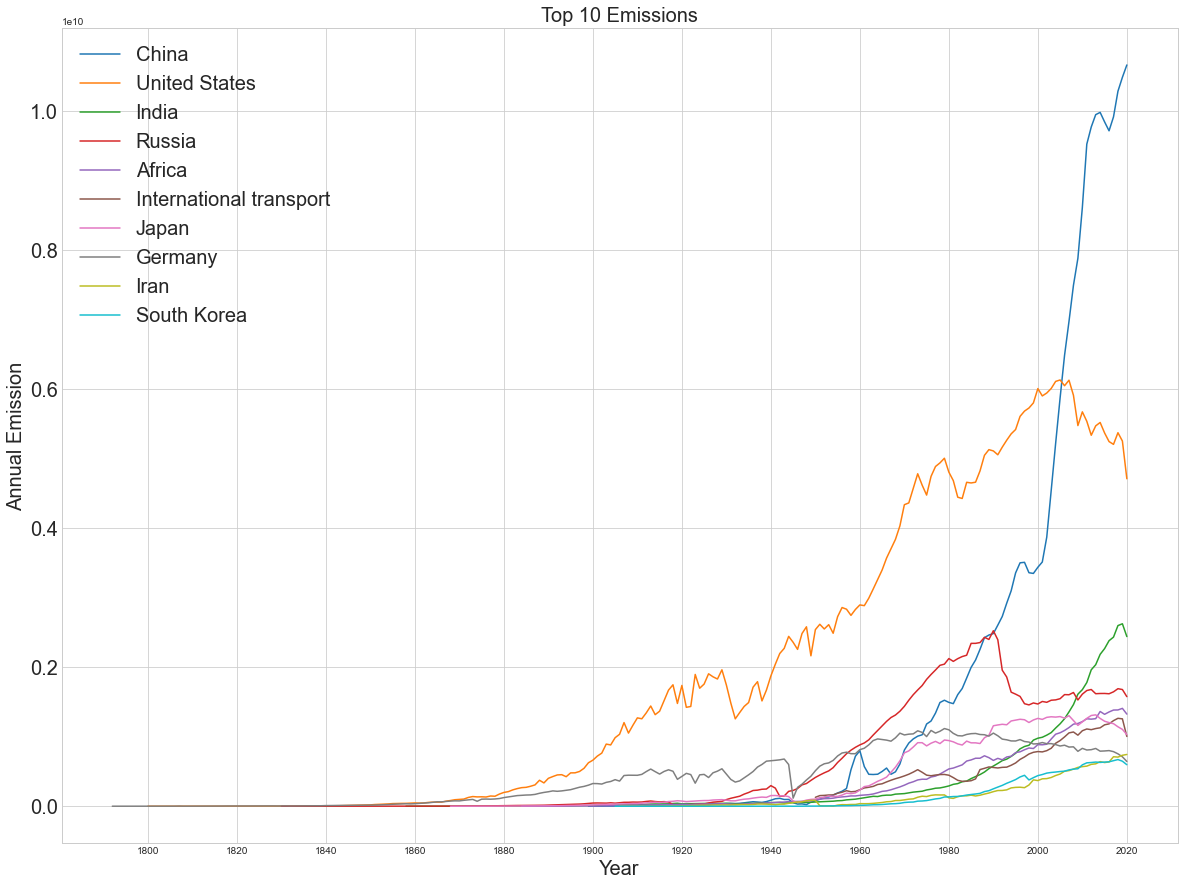

In [18]:
countries = ['China','United States','India','Russia','Africa','International transport','Japan','Germany','Iran','South Korea']
china = df[df['Entity']=='China']
us = df[df['Entity']=='United States']
india = df[df['Entity']=='India']
russia = df[df['Entity']=='Russia']
africa = df[df['Entity']=='Africa']
it = df[df['Entity']=='International transport']
japan = df[df['Entity']=='Japan']
germany = df[df['Entity']=='Germany']
iran = df[df['Entity']=='Iran']
korea = df[df['Entity']=='South Korea']

plt.figure(figsize=(20, 15))
plt.plot(china['Year'], china['Annual CO2 emissions'])
plt.plot(us['Year'], us['Annual CO2 emissions'])
plt.plot(india['Year'], india['Annual CO2 emissions'])
plt.plot(russia['Year'], russia['Annual CO2 emissions'])
plt.plot(africa['Year'], africa['Annual CO2 emissions'])
plt.plot(it['Year'], it['Annual CO2 emissions'])
plt.plot(japan['Year'], japan['Annual CO2 emissions'])
plt.plot(germany['Year'], germany['Annual CO2 emissions'])
plt.plot(iran['Year'], iran['Annual CO2 emissions'])
plt.plot(korea['Year'], korea['Annual CO2 emissions'])

plt.legend(countries, prop={'size': 20})
plt.title('Top 10 Emissions', size=20)
plt.xlabel('Year', size=20)
plt.ylabel('Annual Emission', size=20)
plt.xticks(np.arange(1800,2021,step=20))
plt.yticks(size=20)
plt.show()

# What is the damage?

So the consequence of increasing carbon emissions is climate change. We look at the Global Temperature dataset by [NASA](https://climate.nasa.gov/vital-signs/global-temperature/) which will show us trends in the gloabl temperature

In [19]:
temp = pd.read_csv('/Users/anushadas/Downloads/graph.txt', sep="    ")
temp.columns = ["Year", "No Smoothing", "Lowess(5)"]
temp.head()

,Year,No Smoothing,Lowess(5)
0,1881,-0.08,-0.12
1,1882,-0.10,-0.16
2,1883,-0.17,-0.20
3,1884,-0.28,-0.23
4,1885,-0.33,-0.26


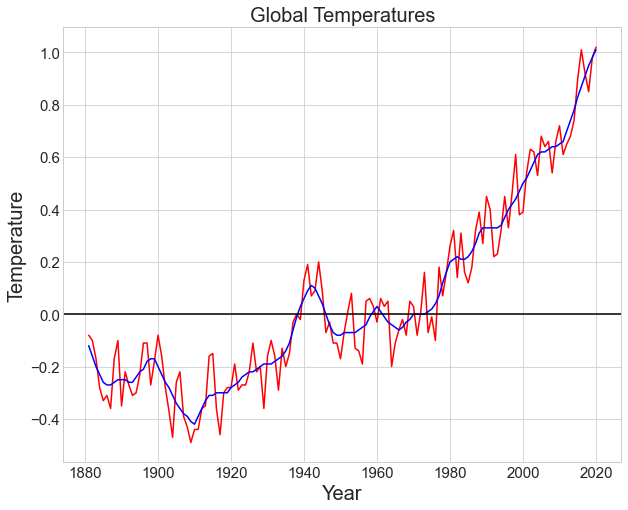

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(temp['Year'], temp['No Smoothing'], color='r')
plt.plot(temp['Year'], temp['Lowess(5)'], color='b')
plt.axhline(y=0, color='black', linestyle='-', label = 'average')
plt.title('Global Temperatures', size=20)
plt.xlabel('Year', size=20)
plt.ylabel('Temperature', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

We see a gradual increase in temperature, so whatever COP26 said was right! 

Though the countries have promised to curb their emissions, they also haven't agreed to use cleaner enegry resources. So we decided that we want to forecast the concentration of CO2 in the air for the next 10 years and then how the Global temperature would be affected by it.

# Dataset

Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.

__Period of Record:__ March 1958 - November 2021

This [dataset](https://gml.noaa.gov/ccgg/trends/mlo.html) includes a monthly observation of atmospheric carbon dioxide (or CO2) concentrations from the Mauna Loa Observatory (Hawaii).


In [21]:
ppm = pd.read_csv('/Users/anushadas/Downloads/maunaloa_co2ppm.txt', sep=",",  index_col=False)

In [22]:
ppm

,year,month,decimal date,average,interpolated,trend,ndays
0,1958,3,1958.2027,315.70,314.43,-1,-9.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99
...,...,...,...,...,...,...,...
760,2021,7,2021.5417,416.96,416.63,30,0.71
761,2021,8,2021.6250,414.47,416.50,26,0.72
762,2021,9,2021.7083,413.30,416.90,27,0.29
763,2021,10,2021.7917,413.93,417.31,29,0.35


# Data Cleaning

In [23]:
ppm.isnull().sum()

year            0
month           0
decimal date    0
average         0
interpolated    0
trend           0
ndays           0
dtype: int64

Setting datetime index

In [24]:
ppm['day']=np.array('01')
ppm['date']=pd.to_datetime(ppm[["year", "month", "day"]])
ppm.set_index('date',inplace = True)

In [25]:
ppm

,year,month,decimal date,average,interpolated,trend,ndays,day
date,,,,,,,,
1958-03-01,1958,3,1958.2027,315.70,314.43,-1,-9.99,01
1958-04-01,1958,4,1958.2877,317.45,315.16,-1,-9.99,01
1958-05-01,1958,5,1958.3699,317.51,314.71,-1,-9.99,01
1958-06-01,1958,6,1958.4548,317.24,315.14,-1,-9.99,01
1958-07-01,1958,7,1958.5370,315.86,315.18,-1,-9.99,01
...,...,...,...,...,...,...,...,...
2021-07-01,2021,7,2021.5417,416.96,416.63,30,0.71,01
2021-08-01,2021,8,2021.6250,414.47,416.50,26,0.72,01
2021-09-01,2021,9,2021.7083,413.30,416.90,27,0.29,01


# Exploratory Data Analysis

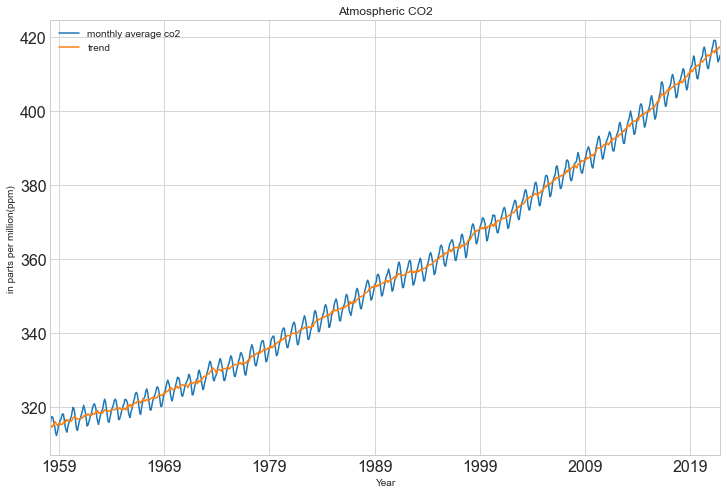

In [26]:
plt.figure(figsize=(12,8))
ppm['average'].plot(label='monthly average co2')
ppm['interpolated'].plot(label='trend')
plt.title('Atmospheric CO2')
plt.xlabel('Year')
plt.ylabel('in parts per million(ppm)')
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend()

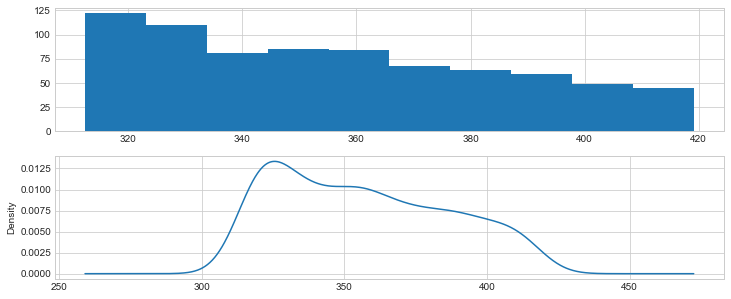

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,5))
ppm['average'].hist(ax=ax1)
ppm['average'].plot(kind='kde', ax=ax2)
plt.show();

# Preparing dataset for modelling

In [28]:
co2 =ppm

In [29]:
co2 = co2.drop(columns=['decimal date','trend','ndays','interpolated'])

In [30]:
co2 = co2.drop(columns=['month','day','year'])

In [31]:
co2['co2']=co2['average']
y=co2['co2']

In [32]:
# Train set.
train = y[:'2010-12-01']
len(train)  # 634 months

# Test set.
test = y['2011-01-01':]
len(test)  # 131 moths

131

# Dickey-Fuller Test
[Stationary Process](https://en.wikipedia.org/wiki/Stationary_process) - A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance, if they are present, also do not change over time.

We will use Augmented Dickey-Fuller test to test our null hypothesis that our series is not stationary. If we get a significant p value, we will reject our null hypothesis and establish that our series is stationary. On the contrary, if we fail to reject our null hypothesis, we will difference the series and run the test again.

In [33]:
def is_stationary(y):

    # "HO: Non-stationary"
    # "H1: Stationary"

    p_value = sm.tsa.stattools.adfuller(y)[1]
    if p_value < 0.05:
        print(F"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    else:
        print(F"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")


is_stationary(y)

Result: Non-Stationary (H0: non-stationary, p-value: 1.0)


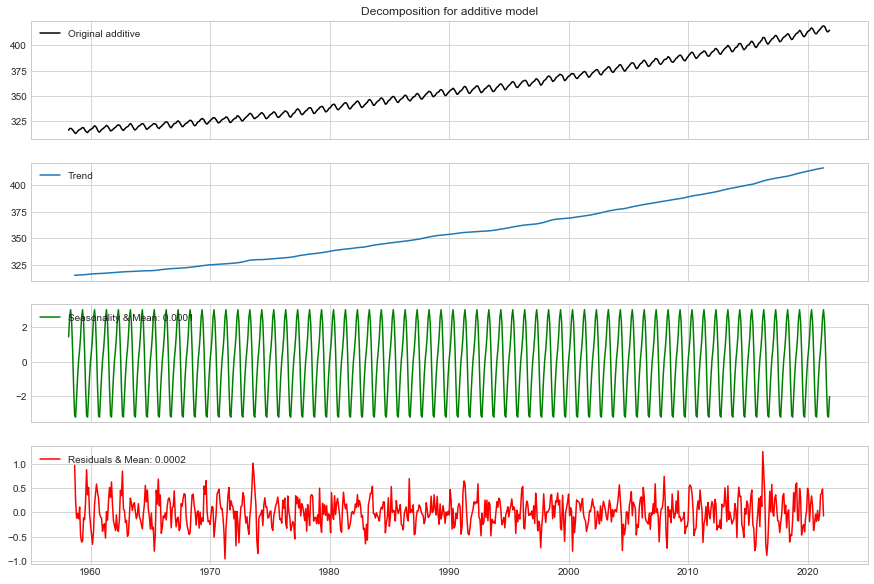

Result: Non-Stationary (H0: non-stationary, p-value: 1.0)


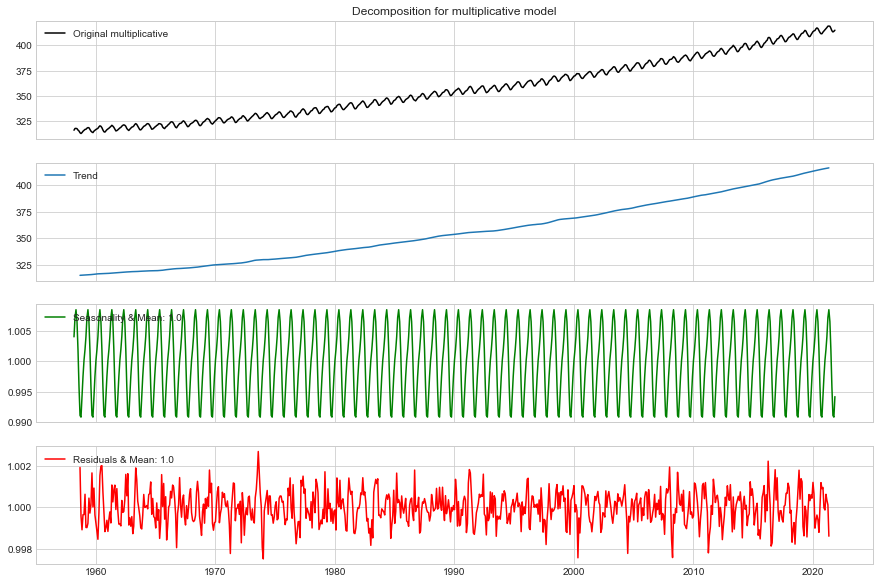

Result: Non-Stationary (H0: non-stationary, p-value: 1.0)


In [34]:
def ts_decompose(y, model="additive", stationary=False):
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)

    if stationary:
        is_stationary(y)
        
for model in ["additive", "multiplicative"]:
    ts_decompose(y, model, stationary=True)

# Modelling the Time Series

There are several ways to model a time seris to make predictions.

We will mention the topics as below:

- Moving Average

- Exponential Smoothing Methods

     -Single Exponential Smoothing (It contains stationarity)
     
     -Double Exponential Smoothing (It contains Level + Trend)
     
     -Triple Exponential Smoothing Holt-Witers (It contains Level + Tred + Seasonality)
     
- ARIMA Models

# 1) Moving Average

The moving average model is probably the most naive approach to time series modelling. This model simply states that the next observation is the mean of all past observations.

Although simple, this model might be surprisingly good and it represents a good starting point.

Otherwise, the moving average can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series, and highlight different trends.


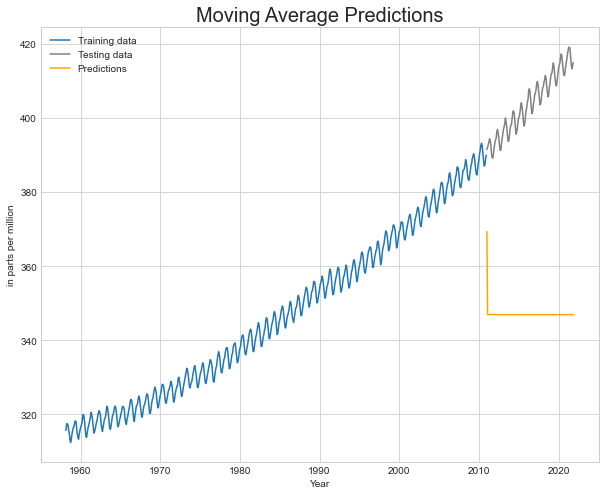

In [35]:
# Train the model
model = ARMA(train, order=(0, 1))
results = model.fit()
predictions = results.forecast(steps=131)
predictions_df = pd.DataFrame(index=test.index, data=predictions[0])

# Plot
plt.figure(figsize=(10,8))
plt.title('Moving Average Predictions', size=20)
plt.xlabel('Year')
plt.ylabel('in parts per million')
plt.plot(train, label='Training data')
plt.plot(test, color='gray', label='Testing data')
plt.plot(predictions_df, color='orange', label='Predictions')
plt.legend();

# 2) Single Exponential Smoothing

$$y=\alpha x_{t} + (1-\alpha)y_{t-1},t>0$$

- Makes predictions by exponentially correcting (recursive).
- The future is more related to the recent past and using the assumption, the effects of the past are weighted.
- Estimates are made by exponentially weighting past actual values and past estimated values.

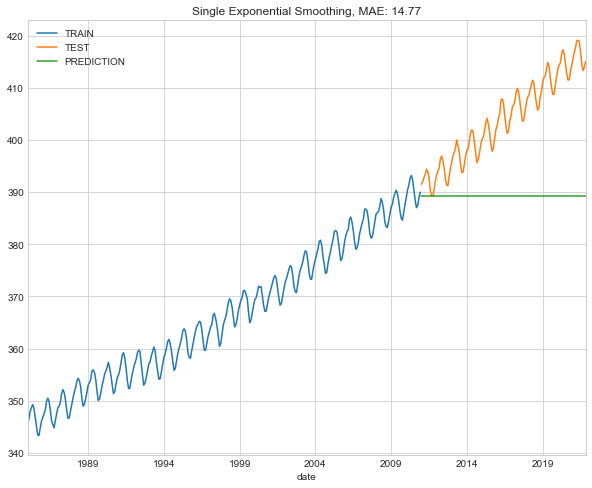

In [36]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.5)
y_pred = ses_model.forecast(131)

def plot_co2(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    train["1985":].plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(10, 8))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()


plot_co2(train, test, y_pred, "Single Exponential Smoothing")

In [37]:
# Hyperparameter Optimization

def ses_optimizer(train, alphas, step=131):
    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.8, 1, 0.01)
ses_optimizer(train, alphas)

best_alpha, best_mae = ses_optimizer(train, alphas)

alpha: 0.8 mae: 14.2783
alpha: 0.81 mae: 14.2622
alpha: 0.82 mae: 14.2463
alpha: 0.83 mae: 14.2306
alpha: 0.84 mae: 14.2151
alpha: 0.85 mae: 14.2
alpha: 0.86 mae: 14.185
alpha: 0.87 mae: 14.1704
alpha: 0.88 mae: 14.156
alpha: 0.89 mae: 14.1419
alpha: 0.9 mae: 14.128
alpha: 0.91 mae: 14.1145
alpha: 0.92 mae: 14.1012
alpha: 0.93 mae: 14.0882
alpha: 0.94 mae: 14.0755
alpha: 0.95 mae: 14.0631
alpha: 0.96 mae: 14.051
alpha: 0.97 mae: 14.0391
alpha: 0.98 mae: 14.0275
alpha: 0.99 mae: 14.0163
best_alpha: 0.99 best_mae: 14.0163
alpha: 0.8 mae: 14.2783
alpha: 0.81 mae: 14.2622
alpha: 0.82 mae: 14.2463
alpha: 0.83 mae: 14.2306
alpha: 0.84 mae: 14.2151
alpha: 0.85 mae: 14.2
alpha: 0.86 mae: 14.185
alpha: 0.87 mae: 14.1704
alpha: 0.88 mae: 14.156
alpha: 0.89 mae: 14.1419
alpha: 0.9 mae: 14.128
alpha: 0.91 mae: 14.1145
alpha: 0.92 mae: 14.1012
alpha: 0.93 mae: 14.0882
alpha: 0.94 mae: 14.0755
alpha: 0.95 mae: 14.0631
alpha: 0.96 mae: 14.051
alpha: 0.97 mae: 14.0391
alpha: 0.98 mae: 14.0275
alpha: 0

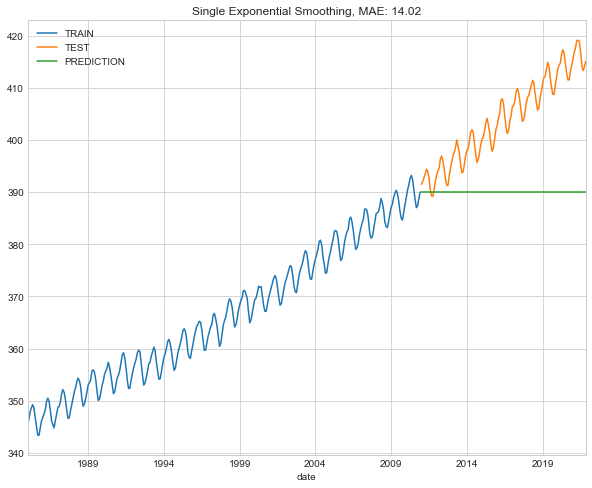

In [38]:
# Final SES Model

ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(131)

plot_co2(train, test, y_pred, "Single Exponential Smoothing")

# 3) Double Exponential Smoothing

$$y = \alpha x_{t} + (1-\alpha)(y_{t-1} + b_{t-1})$$
$$b_{t} = \beta(y_{t} - y_{t-1}) + (1-\beta)b_{t-1}$$

- Makes predictions by exponentially correcting based on trend effect (recursive).
- DES = Level(SSE) + Trend
- The main approach is same like SSE. Additionally, trend effect is considered
- t is used for univariate time series with trend and no seasonality.


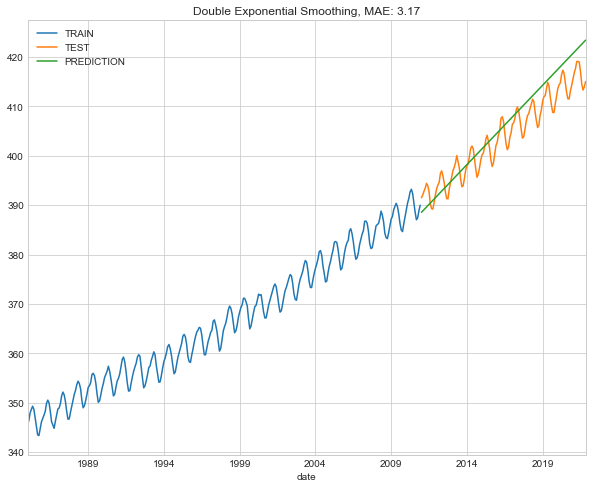

{'smoothing_level': 0.5,
 'smoothing_trend': 0.5,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 317.41753235078204,
 'initial_trend': -0.07567538685096764,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [39]:
# DES: Level (SES) + Trend

des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=0.5,
                                                         smoothing_trend=0.5)

y_pred = des_model.forecast(131)

plot_co2(train, test, y_pred, "Double Exponential Smoothing")

des_model.params

In [40]:
# Hyperparameter Optimization
def des_optimizer(train, alphas, betas, step=131):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha,
                                                                     smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae


alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas)


alpha: 0.01 beta: 0.01 mae: 4.8831
alpha: 0.01 beta: 0.11 mae: 3.6884
alpha: 0.01 beta: 0.21 mae: 2.6451
alpha: 0.01 beta: 0.31 mae: 4.6009
alpha: 0.01 beta: 0.41 mae: 10.6594
alpha: 0.01 beta: 0.51 mae: 3.9783
alpha: 0.01 beta: 0.61 mae: 1.9703
alpha: 0.01 beta: 0.71 mae: 1.9647
alpha: 0.01 beta: 0.81 mae: 3.6126
alpha: 0.01 beta: 0.91 mae: 2.0796
alpha: 0.11 beta: 0.01 mae: 3.9525
alpha: 0.11 beta: 0.11 mae: 5.7676
alpha: 0.11 beta: 0.21 mae: 8.915
alpha: 0.11 beta: 0.31 mae: 13.6324
alpha: 0.11 beta: 0.41 mae: 19.3217
alpha: 0.11 beta: 0.51 mae: 27.0418
alpha: 0.11 beta: 0.61 mae: 35.3932
alpha: 0.11 beta: 0.71 mae: 44.1309
alpha: 0.11 beta: 0.81 mae: 54.3852
alpha: 0.11 beta: 0.91 mae: 66.687
alpha: 0.21 beta: 0.01 mae: 4.5578
alpha: 0.21 beta: 0.11 mae: 10.3423
alpha: 0.21 beta: 0.21 mae: 19.7086
alpha: 0.21 beta: 0.31 mae: 32.0105
alpha: 0.21 beta: 0.41 mae: 46.5891
alpha: 0.21 beta: 0.51 mae: 62.9826
alpha: 0.21 beta: 0.61 mae: 80.2095
alpha: 0.21 beta: 0.71 mae: 96.5131
alpha: 

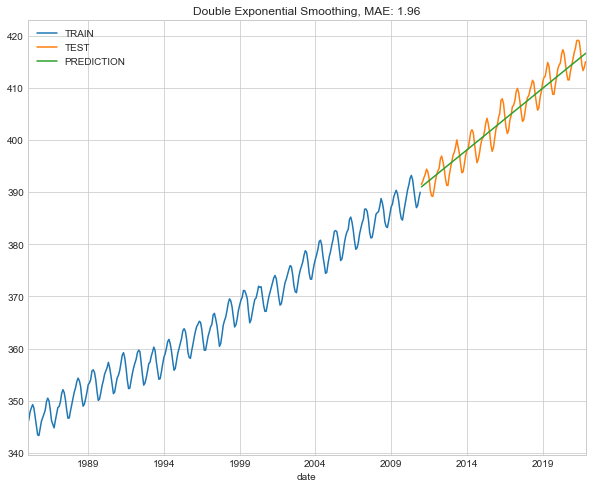

In [41]:
# Final DES Model

final_des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                               smoothing_slope=best_beta)

y_pred = final_des_model.forecast(131)

plot_co2(train, test, y_pred, "Double Exponential Smoothing")

# 4) Triple Exponential Smoothing Holt-Witers

$$level, l_{x} = \alpha(y_{x} - s_{x-L}) + (1-\alpha)(l_{x-1} + b_{x-1})$$


$$trend, b_{x} = \beta(l_{x} - l_{x-1}) + (1-\beta)b_{x-1}$$


$$seasonal, s_{x} = \gamma(y_{x} - l_{x}) + (1-\gamma)s_{x-L}$$


$$forecast, \hat{y_{x+m}}=l_{x} + mb_{x} + s_{x-L+1+(m-1)modL}$$

- Level(SES) + Trend + Seasonality      
- State of art method for smoothinng methods
- This method predicts dynamically using level, trend and seasonality.
        
        

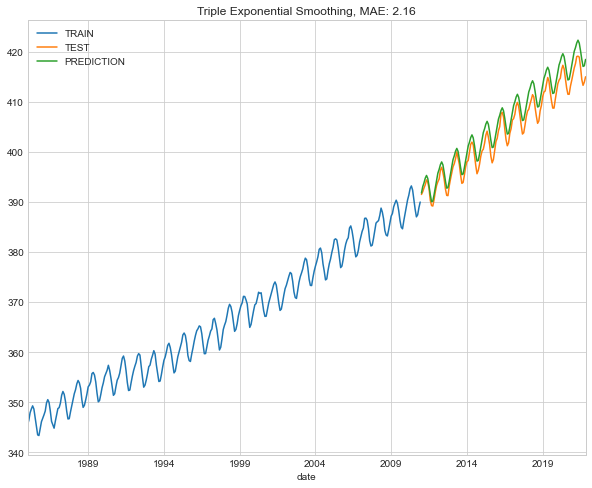

In [42]:
# Triple Exponentıal Smoothing (Holt-Winters)
# TES = SES + DES + Mevsimsellik

tes_model = ExponentialSmoothing(train,
                                 trend="add",
                                 seasonal="add",
                                 seasonal_periods=12).fit(smoothing_level=0.5,
                                                          smoothing_slope=0.5,
                                                          smoothing_seasonal=0.5)


y_pred = tes_model.forecast(131)

plot_co2(train, test, y_pred, "Triple Exponential Smoothing")

In [43]:
# Hyperparameter Optimization


def tes_optimizer(train, abg, step=131):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")

    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae


alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))


best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg)



[0.1, 0.1, 0.1, 1.03]
[0.1, 0.1, 0.3, 0.92]
[0.1, 0.1, 0.5, 0.87]
[0.1, 0.1, 0.7, 0.8]
[0.1, 0.1, 0.9, 0.73]
[0.1, 0.3, 0.1, 0.81]
[0.1, 0.3, 0.3, 1.1]
[0.1, 0.3, 0.5, 1.16]
[0.1, 0.3, 0.7, 1.45]
[0.1, 0.3, 0.9, 2.08]
[0.1, 0.5, 0.1, 0.89]
[0.1, 0.5, 0.3, 0.87]
[0.1, 0.5, 0.5, 0.64]
[0.1, 0.5, 0.7, 1.23]
[0.1, 0.5, 0.9, 0.8]
[0.1, 0.7, 0.1, 3.33]
[0.1, 0.7, 0.3, 2.93]
[0.1, 0.7, 0.5, 3.41]
[0.1, 0.7, 0.7, 6.46]
[0.1, 0.7, 0.9, 8.75]
[0.1, 0.9, 0.1, 7.12]
[0.1, 0.9, 0.3, 9.49]
[0.1, 0.9, 0.5, 6.28]
[0.1, 0.9, 0.7, 2.06]
[0.1, 0.9, 0.9, 9.376351573698668e+19]
[0.3, 0.1, 0.1, 1.43]
[0.3, 0.1, 0.3, 1.11]
[0.3, 0.1, 0.5, 1.33]
[0.3, 0.1, 0.7, 1.94]
[0.3, 0.1, 0.9, 2.28]
[0.3, 0.3, 0.1, 4.47]
[0.3, 0.3, 0.3, 2.25]
[0.3, 0.3, 0.5, 5.68]
[0.3, 0.3, 0.7, 12.52]
[0.3, 0.3, 0.9, 6.36]
[0.3, 0.5, 0.1, 7.84]
[0.3, 0.5, 0.3, 16.79]
[0.3, 0.5, 0.5, 2.34]
[0.3, 0.5, 0.7, 40720.24]
[0.3, 0.5, 0.9, 4.333208764410592e+22]
[0.3, 0.7, 0.1, 9.3]
[0.3, 0.7, 0.3, 2.97]
[0.3, 0.7, 0.5, 5032.89]
[0.3, 0.7, 0.7,

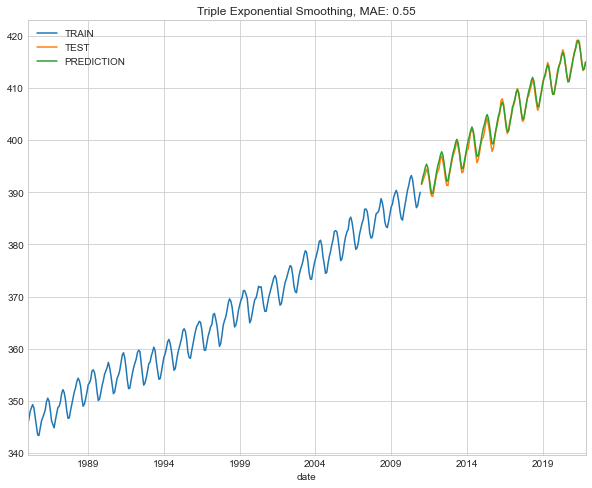

In [44]:
# Final TES Model

final_tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

y_pred = final_tes_model.forecast(131)

plot_co2(train, test, y_pred, "Triple Exponential Smoothing")

In [45]:
nbStep = 240
forecast = final_tes_model.forecast(steps=nbStep)

In [46]:
forecast

2011-01-01    391.575311
2011-02-01    392.777171
2011-03-01    393.623983
2011-04-01    394.723260
2011-05-01    395.378297
                 ...    
2030-08-01    436.360088
2030-09-01    434.899674
2030-10-01    435.002316
2030-11-01    436.306933
2030-12-01    437.635259
Freq: MS, Length: 240, dtype: float64

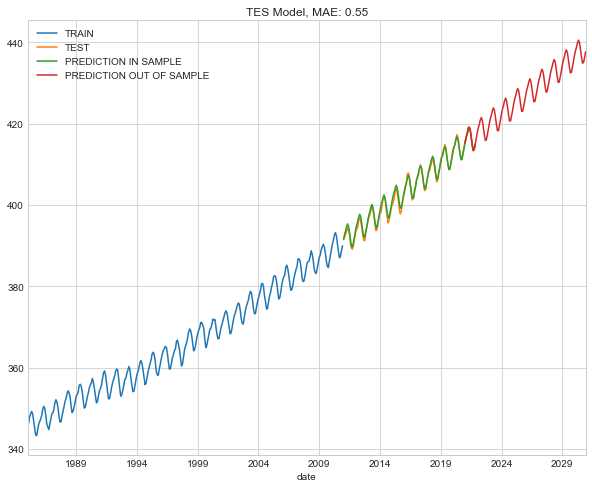

In [47]:
mae = mean_absolute_error(test, y_pred)
train["1985":].plot(legend=True, label="TRAIN", title=f"TES Model, MAE: {round(mae,2)}")
test.plot(legend=True, label="TEST", figsize=(10, 8))
y_pred.plot(legend=True, label="PREDICTION IN SAMPLE")
forecast["2021":].plot(legend=True, label="PREDICTION OUT OF SAMPLE")
plt.show()

In [48]:
forecast = forecast.to_frame()
newCO2 = pd.DataFrame(columns=['newCO2'])
newCO2['newCO2'] = forecast.iloc[:,0]
newCO2.index = forecast.index

In [49]:
newCO2

,newCO2
2011-01-01,391.575311
2011-02-01,392.777171
2011-03-01,393.623983
2011-04-01,394.723260
2011-05-01,395.378297
...,...
2030-08-01,436.360088
2030-09-01,434.899674
2030-10-01,435.002316
2030-11-01,436.306933


# Autocorrelation (ACF)

Informally, autocorrelation is the similarity between observations as a function of the time lag between them.

![image.png](https://miro.medium.com/max/700/1*F5wTJgw8dpteJssJVGXPcg.png)

Above is an example of an autocorrelation plot. Looking closely, you realize that the first value and the 24th value have a high autocorrelation. Similarly, the 12th and 36th observations are highly correlated. This means that we will find a very similar value at every 24 unit of time.
Notice how the plot looks like sinusoidal function. This is a hint for seasonality, and you can find its value by finding the period in the plot above, which would give 24h.

Variance is : $Var(x_t)= \sigma^2_w(1+\theta^2_1)$

Autocorrelation function (ACF) is: $ \rho_1 = \dfrac{\theta_1}{1+\theta^2_1}, \text{ and } \rho_h = 0 \text{ for } h \ge 2 $

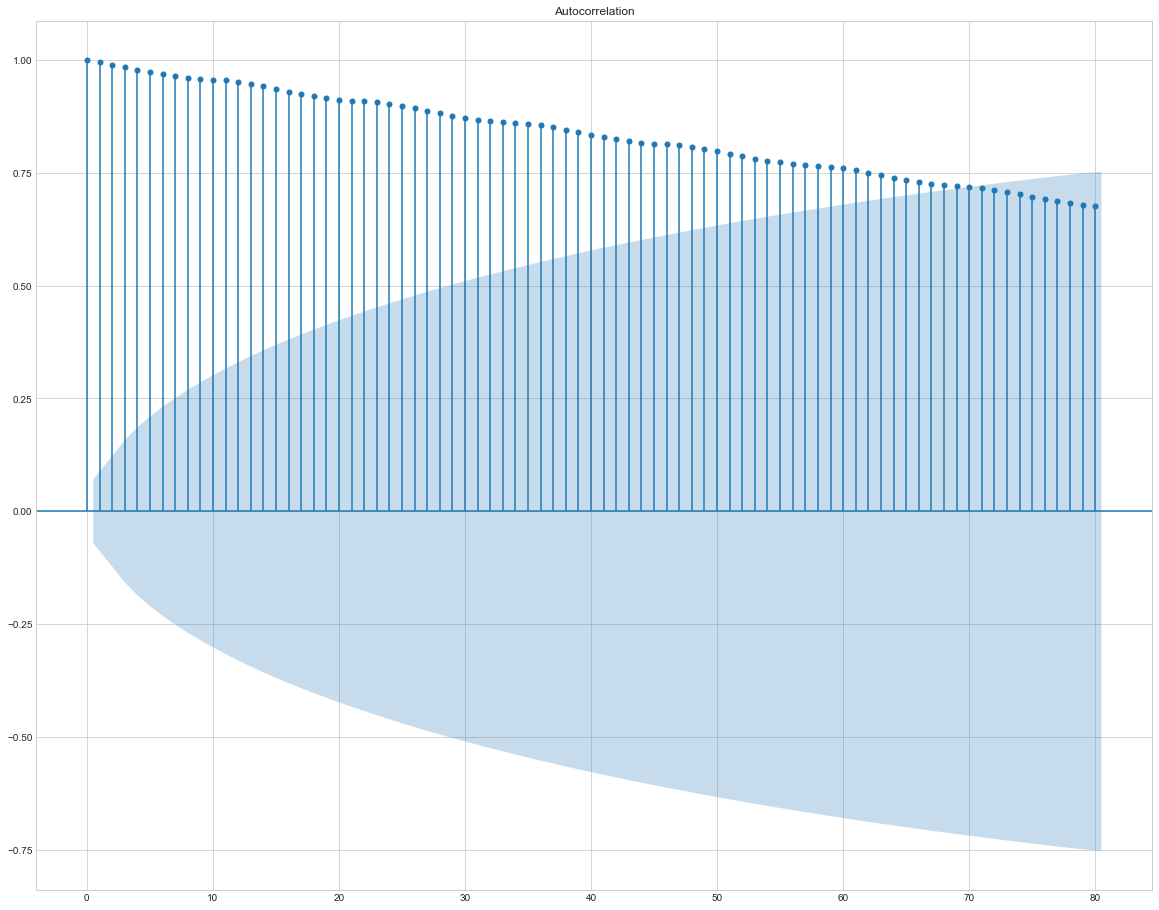

In [50]:
plot_acf(y, lags=80)
plt.show()

# 1) AR(p): Autoregression

This is basically a regression of the time series onto itself. Here, we assume that the current value depends on its previous values with some lag. It takes a parameter p which represents the maximum lag. To find it, we look at the partial autocorrelation plot and identify the lag after which most lags are not significant.

In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable.

Thus, an autoregressive model of order p can be written as;

>$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}, $

where $\varepsilon_t$ s white noise. This is like a multiple regression but with lagged values of yt as predictors.


> Estimation is made by a linear combination of observations from previous time steps.

> Suitable for univariate time series without trend and seasonality

# 2) MA(q): Moving Average

A moving average term in a time series model is a past error (multiplied by a coefficient).

>The 1st order moving average model, denoted by MA(1) is:

> $x_t = \mu + w_t +\theta_1w_{t-1}$

>The 2nd order moving average model, denoted by MA(2) is:

> $x_t = \mu + w_t +\theta_1w_{t-1}+\theta_2w_{t-2}$

>The qth order moving average model, denoted by MA(q) is:

> $x_t = \mu + w_t +\theta_1w_{t-1}+\theta_2w_{t-2}+\dots + \theta_qw_{t-q}$


## ACF for General MA(q) Models

A property of MA(q) models in general is that there are nonzero autocorrelations for the first q lags and autocorrelations = 0 for all lags > q.

For a time series;

> $\rho_h = \dfrac{\text{Covariance for lag h}}{\text{Variance}}$

Apply this result to get the ACF

## Partial Autocorrelation Function (PACF)

In general, a partial correlation is a conditional correlation. It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables. For instance, consider a regression context in which y is the response variable and x1, x2 and x3 are predictor variables. The partial correlation between y and x3 is the correlation between the variables determined taking into account how both y and x3 are related to x1 and x2.

In regression, this partial correlation could be found by correlating the residuals from two different regressions:

>Regression in which we predict y from x1 and x2

>regression in which we predict x3 from x1 and x2, Basically we correlate the parts of y and x3 that are not predicted by x1 and x2


$\dfrac{\text{Covariance}(y, x_3|x_1, x_2)}{\sqrt{\text{Variance}(y|x_1, x_2)\text{Variance}(x_3| x_1, x_2)}}$

# Some Useful Facts About PACF and ACF Patterns

__Identification of an AR model is often best done with the PACF.__

> For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

__Identification of an MA model is often best done with the ACF rather than the PACF__

>For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

# ARIMA Model(p,q) = AR(p) + MA(q)

ARIMA models, also called Box-Jenkins models, are models that may possibly include autoregressive terms, moving average terms, and differencing operations. Various abbreviations are used:

>When a model only involves autoregressive terms it may be referred to as an AR model. When a model only involves moving average terms, it may be referred to as an MA model.

>When no differencing is involved, the abbreviation ARMA may be used.

__Summary:__

>AutoRegressive Moving Average(ARIMA) combines AR and MA methods

>It predicts with a linear combination of past values ​​and past errors.

> Suitable for univariate time series without trend and seasonality

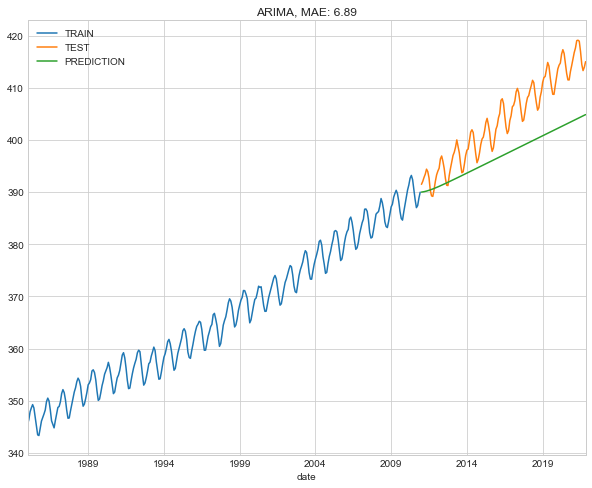

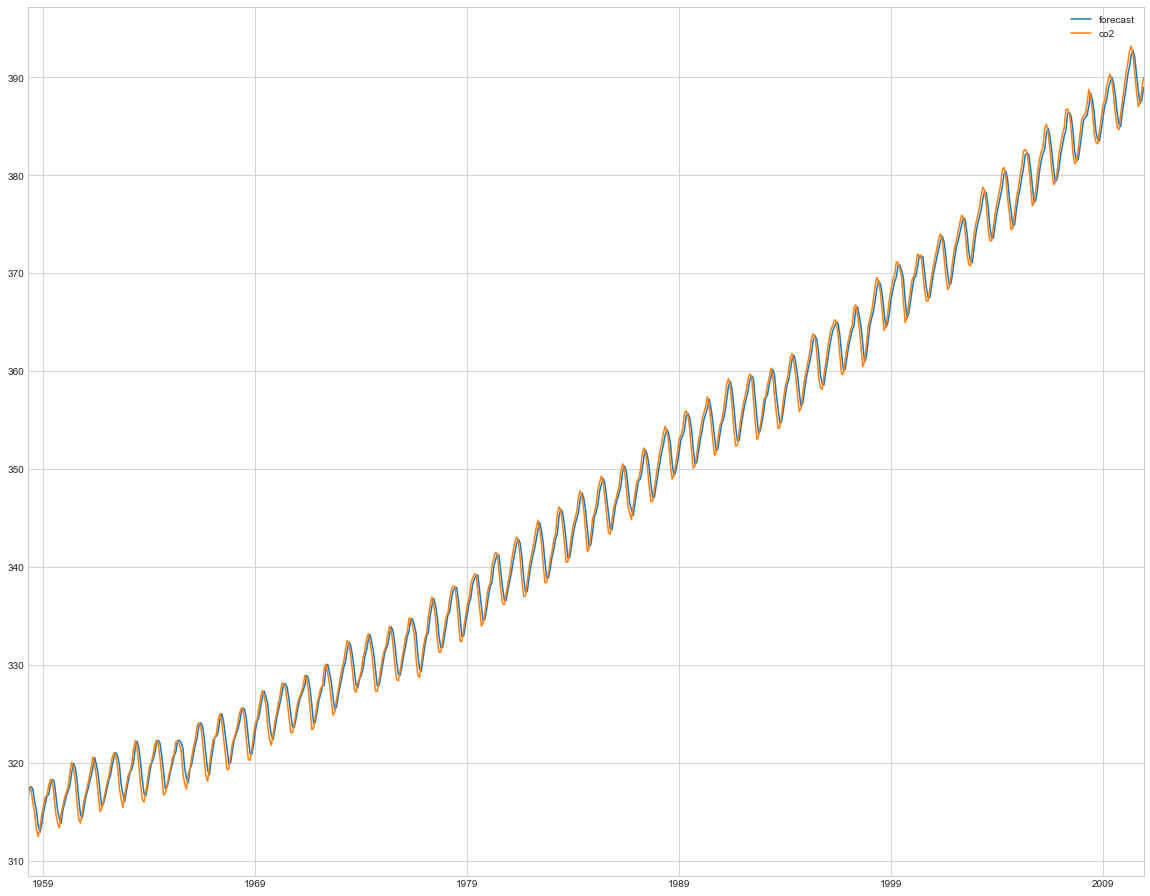

In [51]:
# ARIMA(p, d, q): (Autoregressive Integrated Moving Average)

arima_model = ARIMA(train, order=(1, 1, 1)).fit(disp=0)
arima_model.summary()

y_pred = arima_model.forecast(131)[0]
y_pred = pd.Series(y_pred, index=test.index)


plot_co2(train, test, y_pred, "ARIMA")

arima_model.plot_predict(dynamic=False)
plt.show()

In [52]:
# Hyperparameter Optimization (Model Derecelerini Belirleme)

#1. Determining Model Grade Based on AIC Statistics
#2. Determining Model Grade Based on ACF & PACF Charts


# 1.Determining Model Grade Based on AIC & BIC Statistics


# producing p and q combinations
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arma_model_result = ARIMA(train, order).fit(disp=0)
            aic = arma_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params


best_params_aic = arima_optimizer_aic(train, pdq)


ARIMA(0, 0, 0) AIC=5745.04
ARIMA(0, 0, 1) AIC=4887.57
ARIMA(0, 1, 0) AIC=2041.17
ARIMA(0, 1, 1) AIC=1658.52
ARIMA(0, 1, 2) AIC=1498.95
ARIMA(0, 1, 3) AIC=1418.38
ARIMA(0, 2, 0) AIC=1700.92
ARIMA(0, 2, 1) AIC=1653.45
ARIMA(0, 2, 2) AIC=1635.50
ARIMA(0, 2, 3) AIC=1504.20
ARIMA(1, 0, 0) AIC=2058.88
ARIMA(1, 0, 2) AIC=1513.07
ARIMA(1, 0, 3) AIC=1431.06
ARIMA(1, 1, 0) AIC=1606.10
ARIMA(1, 1, 1) AIC=2018.64
ARIMA(1, 1, 2) AIC=1618.47
ARIMA(1, 2, 0) AIC=1650.88
ARIMA(2, 0, 0) AIC=1617.51
ARIMA(2, 0, 1) AIC=1530.41
ARIMA(2, 0, 2) AIC=1675.94
ARIMA(2, 0, 3) AIC=1495.32
ARIMA(2, 1, 0) AIC=1426.08
ARIMA(2, 1, 2) AIC=1209.51
ARIMA(2, 1, 3) AIC=1057.94
ARIMA(2, 2, 0) AIC=1647.80
ARIMA(3, 0, 0) AIC=1440.78
ARIMA(3, 1, 0) AIC=1364.61
ARIMA(3, 1, 3) AIC=1057.22
ARIMA(3, 2, 0) AIC=1575.64
Best ARIMA(3, 1, 3) AIC=1057.22


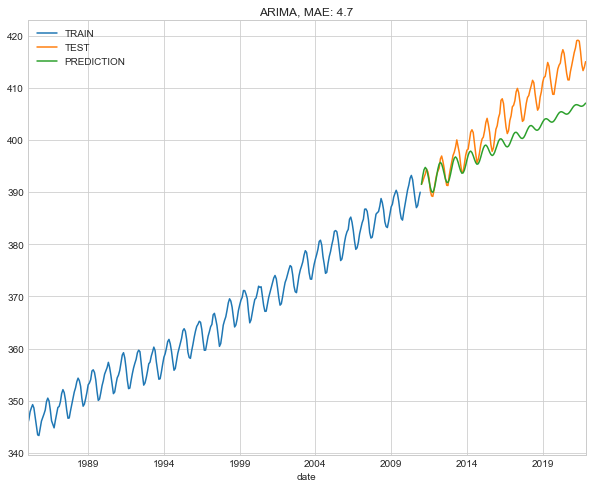

In [53]:
# Final Model

arima_model = ARIMA(train, best_params_aic).fit(disp=0)
y_pred = arima_model.forecast(131)[0]
y_pred = pd.Series(y_pred, index=test.index)

plot_co2(train, test, y_pred, "ARIMA")

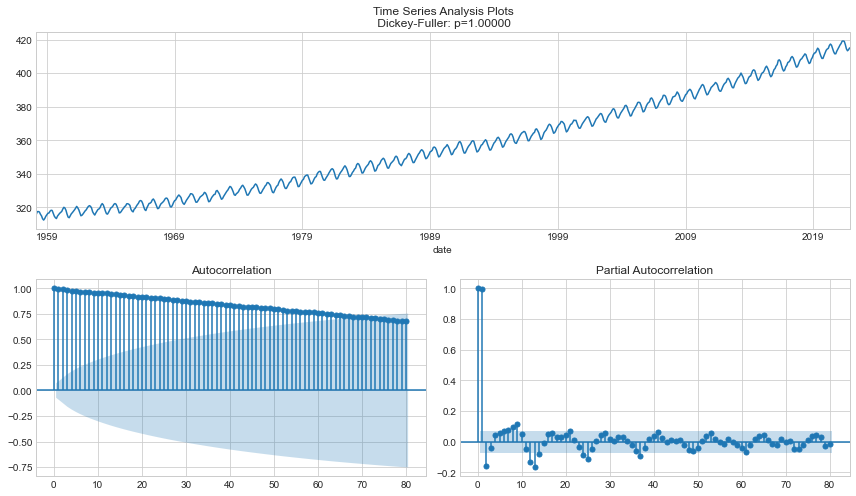

In [54]:
# Determining Model Grade Based on ACF & PACF Charts

def acf_pacf(y, lags=80):
    plt.figure(figsize=(12, 7))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    y.plot(ax=ts_ax)

    # Stationarity test (HO: Series is not Stationary. H1: Series is Stationary.)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()
    plt.show()

acf_pacf(y)

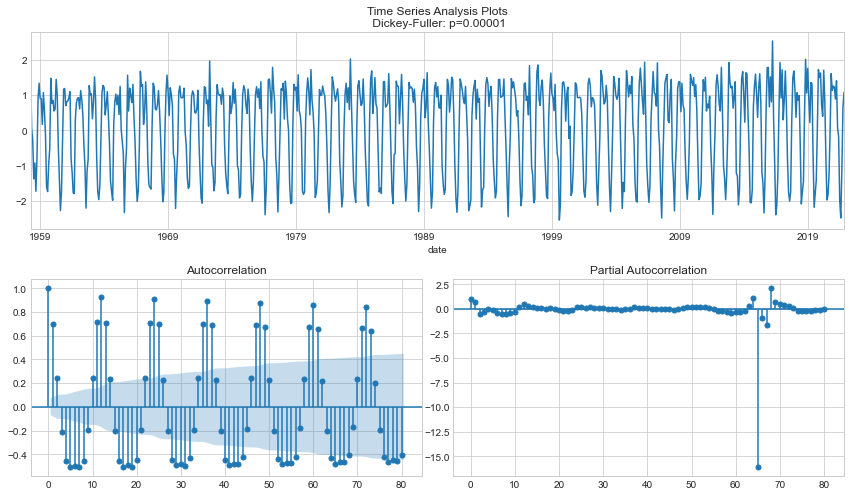

In [55]:
# Determining Model Grade with ACF and PACF Chart


# IF ACF width "DECREASE" relative to the delays and PACF "CUT" after the p delay means it's an AR(p) pattern.

# If the ACF width q "CUT" after the delay and the PACF width "DECREASE" according to the delays, it means 
# it's a MA(q) pattern.

# If the widths of ACF and PACF are decreasing according to the delays, it means it is an ARMA model.
df_diff = y.diff()
df_diff.dropna(inplace=True)

acf_pacf(df_diff)

# SARIMA(p, d, q): (Seasonal Autoregressive Integrated Moving-Average)

After, we add the order of integration I(d). The parameter d represents the number of differences required to make the series stationary.
Finally, we add the final component: seasonality S(P, D, Q, s), where s is simply the season’s length. Furthermore, this component requires the parameters P and Q which are the same as p and q, but for the seasonal component. Finally, D is the order of seasonal integration representing the number of differences required to remove seasonality from the series.
Combining all, we get the SARIMA(p, d, q)(P, D, Q, s) model.
The main takeaway is: before modelling with SARIMA, we must apply transformations to our time series to remove seasonality and any non-stationary behaviors.


__Summary__:

>ARIMA + seasonality

>It can be used in univariate series with trend and/or seasonality.

>The p,d,q parameters are the parameters from the ARIMA model. They are trend elements and ARIMA can model the trend.

>p: Actual value delay number (autoregressive degree)

>d: Number of difference operations (degree of difference)

>q: Error delay number (Moving average degree)

P,D,Q seasonal lag numbers.

m is the number of time steps for a single seasonal period. Expresses the structure of seasonality.

# Model Usage for Different Scenario

>Stationarity: SES, AR, MA, ARMA

>Trend : DES, ARIMA, SARIMA

>Trend + Seasonality: TES + SARIMA

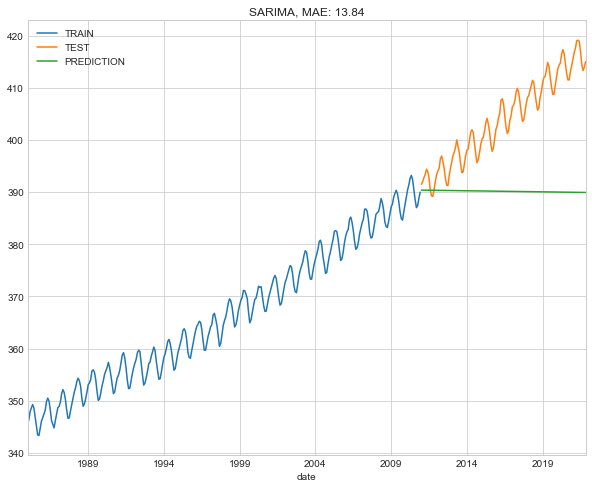

In [56]:
# SARIMA(p, d, q): (Seasonal Autoregressive Integrated Moving-Average)

model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12))
sarima_model = model.fit(disp=0)

y_pred_test = sarima_model.get_forecast(steps=131)
y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

plot_co2(train, test, y_pred, "SARIMA")

In [57]:
# Hyperparameter Optimization


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), float("inf"), None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order


best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)



SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9220.596700626493
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8403.913264978411
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2359.171114923126
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2037.7600273632347
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2589.4832587798696
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2283.1156183288813
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1646.1206310484306
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1293.2584831310837
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8351.243042210797
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7533.274534268377
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1746.955204788888
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1584.3287003646312
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1999.0482265893982
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1862.2890144782505
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1356.5879840961807
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:988.2281784422619
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2045.1061911221557
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:

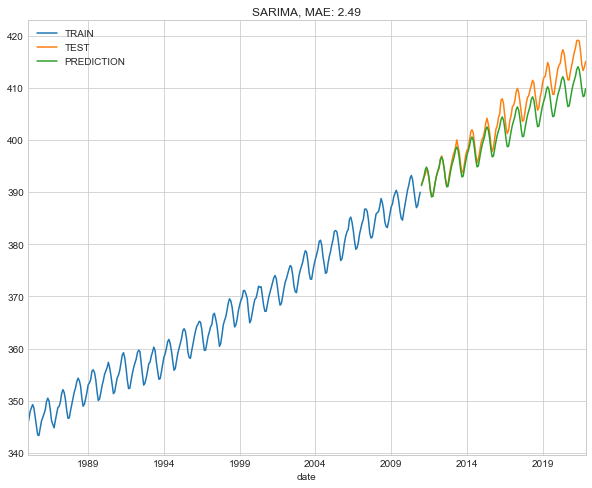

In [58]:
# Final Model

model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)

y_pred_test = sarima_final_model.get_forecast(steps=131)

# MAE
y_pred = y_pred_test.predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

plot_co2(train, test, y_pred, "SARIMA")

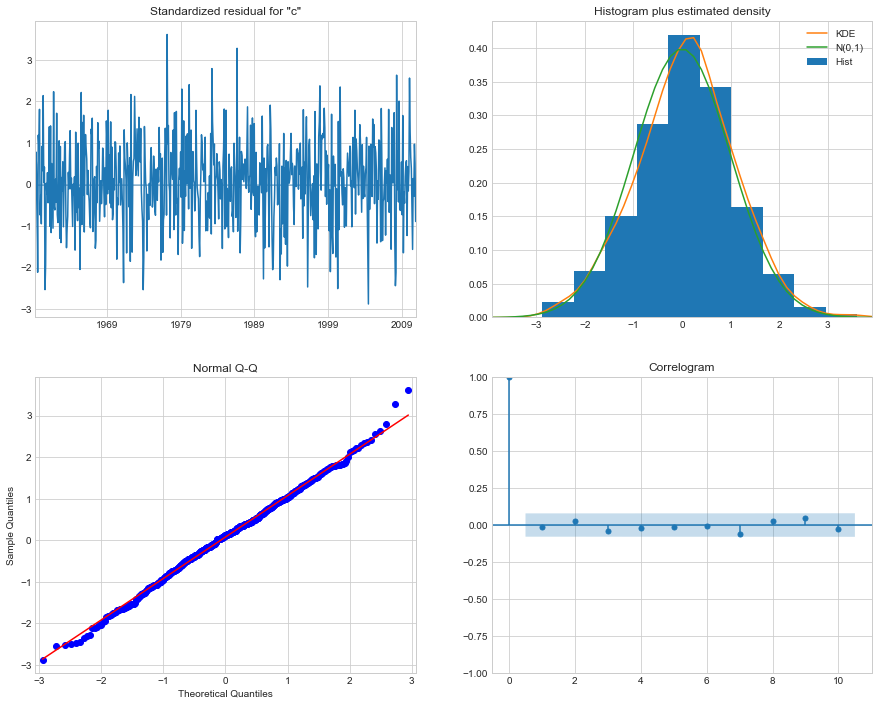

In [59]:
# Examining the Statistical Outputs of the Model
sarima_final_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [60]:
nbStep = 240
fc = sarima_final_model.get_forecast(steps=nbStep)
fc.summary_frame()

co2,mean,mean_se,mean_ci_lower,mean_ci_upper
2011-01-01,391.254925,0.301323,390.664342,391.845508
2011-02-01,392.122004,0.360955,391.414545,392.829464
2011-03-01,392.984807,0.402279,392.196355,393.773258
2011-04-01,394.276288,0.437995,393.417833,395.134743
2011-05-01,394.806641,0.470682,393.884121,395.729162
...,...,...,...,...
2030-08-01,427.092863,6.108457,415.120508,439.065218
2030-09-01,425.639883,6.136530,413.612506,437.667260
2030-10-01,425.755256,6.164475,413.673107,437.837405
2030-11-01,427.141637,6.192294,415.004964,439.278310


In [61]:
forecast = fc.predicted_mean
confidence = fc.conf_int()
forecast = pd.Series(forecast)

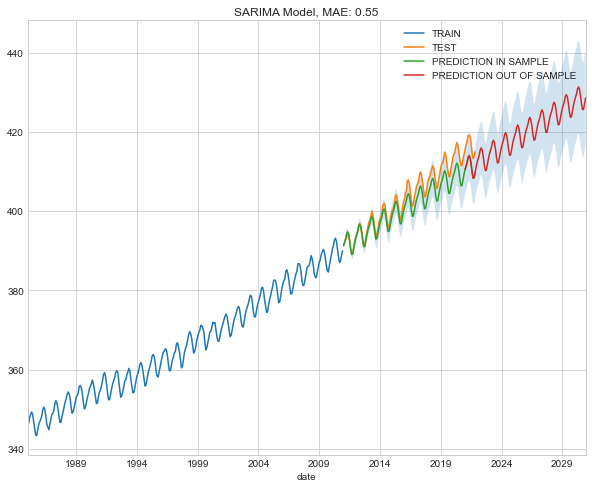

In [62]:
#mae = mean_absolute_error(test, y_pred)
train["1985":].plot(legend=True, label="TRAIN", title=f"SARIMA Model, MAE: {round(mae,2)}")
test.plot(legend=True, label="TEST", figsize=(10, 8))
y_pred.plot(legend=True, label="PREDICTION IN SAMPLE")
plt.fill_between(forecast.index, confidence.iloc[:,0], confidence.iloc[:,1],alpha=0.2)
forecast["2021":].plot(legend=True, label="PREDICTION OUT OF SAMPLE")
plt.show()

# Support Vector Regression

Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

#### Preparing dataset for modelling

In [63]:
temp = pd.read_csv('/Users/anushadas/Downloads/graph.txt', sep="    ")
temp.columns = ["Year", "No Smoothing", "Lowess(5)"]
temp.head()

,Year,No Smoothing,Lowess(5)
0,1881,-0.08,-0.12
1,1882,-0.10,-0.16
2,1883,-0.17,-0.20
3,1884,-0.28,-0.23
4,1885,-0.33,-0.26


In [64]:
ppm['Year'] = ppm['year']

In [65]:
ppm

,year,month,decimal date,average,interpolated,trend,ndays,day,Year
date,,,,,,,,,
1958-03-01,1958,3,1958.2027,315.70,314.43,-1,-9.99,01,1958
1958-04-01,1958,4,1958.2877,317.45,315.16,-1,-9.99,01,1958
1958-05-01,1958,5,1958.3699,317.51,314.71,-1,-9.99,01,1958
1958-06-01,1958,6,1958.4548,317.24,315.14,-1,-9.99,01,1958
1958-07-01,1958,7,1958.5370,315.86,315.18,-1,-9.99,01,1958
...,...,...,...,...,...,...,...,...,...
2021-07-01,2021,7,2021.5417,416.96,416.63,30,0.71,01,2021
2021-08-01,2021,8,2021.6250,414.47,416.50,26,0.72,01,2021
2021-09-01,2021,9,2021.7083,413.30,416.90,27,0.29,01,2021


We merge our Monthly Average CO2 data with the temperature data for modelling. 

In [66]:
df = pd.merge(ppm,temp,on='Year',how='inner')
df

,year,month,decimal date,average,interpolated,trend,ndays,day,Year,No Smoothing,Lowess(5)
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,01,1958,0.06,-0.01
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,01,1958,0.06,-0.01
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,01,1958,0.06,-0.01
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,01,1958,0.06,-0.01
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,01,1958,0.06,-0.01
...,...,...,...,...,...,...,...,...,...,...,...
749,2020,8,2020.6250,412.78,414.80,25,0.25,01,2020,1.02,1.01
750,2020,9,2020.7083,411.52,415.13,29,0.31,01,2020,1.02,1.01
751,2020,10,2020.7917,411.51,414.89,30,0.22,01,2020,1.02,1.01
752,2020,11,2020.8750,413.12,415.15,27,0.81,01,2020,1.02,1.01


In [67]:
df = df.drop(columns=['decimal date','interpolated','trend','ndays','No Smoothing','Year'])

In [68]:
df['day']=np.array('01')

In [69]:
df['date']=pd.to_datetime(df[["year", "month", "day"]])
df.set_index('date',inplace = True)

In [70]:
df=df.drop(columns=['year','month','day'])

In [71]:
df.head()

,average,Lowess(5)
date,,
1958-03-01,315.70,-0.01
1958-04-01,317.45,-0.01
1958-05-01,317.51,-0.01
1958-06-01,317.24,-0.01
1958-07-01,315.86,-0.01


In [72]:
df.tail()

,average,Lowess(5)
date,,
2020-08-01,412.78,1.01
2020-09-01,411.52,1.01
2020-10-01,411.51,1.01
2020-11-01,413.12,1.01
2020-12-01,414.26,1.01


The dataset needs to be resampled to get yearly averages, since we have yearly temperatures.

In [73]:
df=df[['average','Lowess(5)']].resample('A').mean()
df

,average,Lowess(5)
date,,
1958-12-31,315.232000,-0.01
1959-12-31,315.980833,0.01
1960-12-31,316.910000,0.03
1961-12-31,317.644167,0.01
1962-12-31,318.454167,-0.01
...,...,...
2016-12-31,404.412500,0.87
2017-12-31,406.757500,0.91
2018-12-31,408.715000,0.95


In [74]:
fig = px.scatter(df, x=df['average'], y=df['Lowess(5)'], 
                 opacity=0.8)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="temp based on emissions", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

#### The scatterplot above shows that the CO2 levels and temperature are directly proportional to each other, i.e., as CO2 increases temperature also increases

In [75]:
X = df.iloc[:, 0].values # independent variable
y = df.iloc[:, 1].values # dependent variable
X = np.array(X).reshape(-1,1)

In [76]:
# Transforming data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [77]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [78]:
# Fitting the model
regressor = SVR(kernel='rbf',C=1000)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

SVR(C=1000)

In [79]:
# Predicting 
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [80]:
pred_df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
0,0.16,0.140338
1,-0.01,-0.015900
2,-0.05,-0.029178
3,0.22,0.254354
4,0.74,0.743404
5,0.01,0.037709
6,0.62,0.600007
7,0.34,0.351612
8,-0.04,-0.023504
9,0.78,0.771414


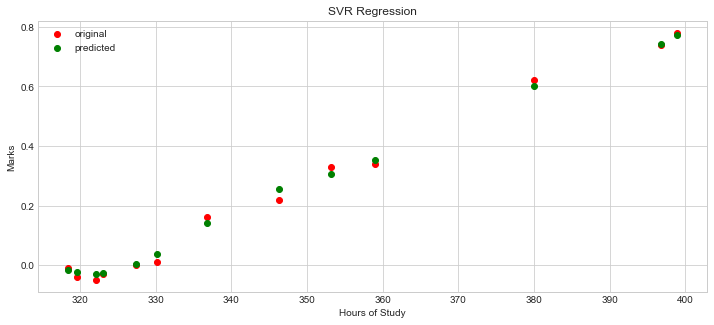

In [81]:
# Visualising the model
plt.figure(figsize=(12,5))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.legend(['original','predicted'])
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_test.reshape(-1)), y_pred,squared=False)

0.01834342314227499

In [83]:
r2_score(sc_y.inverse_transform(y_test.reshape(-1)), y_pred)

0.9960913008876965

Since the R-square score is 99%, it is likely that the SVR model is overfitted. Since we resampled the data, it downsampled our data, resulting in less data for training and testing. In the future if there is more data available, the model should perform better without overfitting.

Future temperature forecasting can also be done using a timeseries model where we keep the temperature as the dependent variable and CO2 emissions as the independent variable since we know that a timeseries model gives more credible results based on other variables and not using the dependent variable.

# Remedies
- Limiting Industrial Use of Coal and Methane.
- Planting more trees.
- Enhancing the existing system to limit the carbon emmision and using more eco friendly techniques.
- Replacing our current energy sources to more cleaner sources like nuclear enery.
- Considering the top 10 global emitters , its possible to make a drastic balance in the carbon emission if they limit the use leading by examples and this would be a huge imapact on global scale.
    
    